# Latent Probability Model

If you are running this for the first time you may need to use the following commands before continuing:

In [1]:
!pip install pandas
!pip install spacy
!pip install spacytextblob
!python -m spacy download en_core_web_sm

!pip install newspaper3k

!pip install plotly

!pip install sklearn

  Using cached pandas-1.3.5.tar.gz (4.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2488 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  C:\Users\gabri\AppData\Local\Temp\pip-build-env-n5ey8eu1\overlay\Lib\site-packages\setuptools\config\setupcfg.py:293: _DeprecatedConfig: Deprecated config in `setup.cfg`
  !!
  
          ********************************************************************************
          The license_file parameter is deprecated, use license_files instead.
  
          By 2023-Oct-30, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    parsed = self.parsers.get(option_name, lambda x: x)(value)
  running bdist_wheel
  ru

  Using cached spacy-3.2.0.tar.gz (1.1 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [475 lines of output]
    Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
    Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
    Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl (39 kB)
    Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl (122 kB)
    Using cached murmurhash-1.0.10-cp311-cp311-win_amd64.whl (25 kB)
    Using cached thinc-8.0.17.tar.gz (189 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Installing backend dependencies: started
    Installing backend dependencies: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'done'
    Using cached blis-0.7

^C



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.8/12.8 MB 10.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [143]:
from newspaper import Article
from random import shuffle
import re
import matplotlib.pyplot as plt 
from collections import Counter

import numpy as np
import json
import requests
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim
import plotly.express as px
import matplotlib.colors as mcolors
import sklearn
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [144]:
#import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import requests
#from newspaper import Article
#import numpy as np

In [145]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb
%run DataVisualization.ipynb

IMPORTANT: If you want to try re-runing after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

In [146]:
# Loading our two pipelines
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

IMPORTANT: Insert the .csv file you want to be read below.

In [147]:
csvFile = "urls.csv"
wordCountFilter = 150
#social_starts_with = ["https://www.youtube.com", "https://youtu.be", "https://www.facebook.com", 
#                     "https://twitter.com", "https://gettr.com/"]


In [148]:
# rerun
# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking
all_text_gathered = []
all_articles = ''
scentence_list = []


# This is the pipeline. All code is called and ran through here.

In [149]:
# Loops through our URLS and scraps the data
# Put all empty dictionaries here
sentimentDic = {}
    
for count, x in enumerate(urls):
    if(count % 10 == 0):
        print(str(count))

    url = x

    # Send the URL to get scraped
    page_text = scrapeData(x)
    # All articles will have a long string of all the text that has been scraped
    all_articles = all_articles + " " +  page_text
    
    # Puts the article into a list of all the sentences in the article
    sentenceList = sentenceLevel(page_text)

    # Runs sentiment analysis. Will need to make a new function and a new dictionary
    # for each type of analysis we want to run. Will pass in the page_text, the dic, and
    # x (the url)
    sentimentDic = sentimentAnalysis(page_text, sentimentDic, url)
        
        
        
#print("The average sentiment score was: " + str(sum(url_sent_score) / len(url_sent_score)))
#print("The average subjectivity score was: " + str(sum(url_subj_score) / len(url_subj_score)))

# For each analysis we run we need to then convert that dictionary with the following method
df = dictionaryToDataFrame(sentimentDic)
df
# Used if we want to convert it to a .csv sentDic.to_csv("sentiment130.csv")


0
word count  236
repeated phrases 6
https://www.reuters.com/world/us/us-army-discharge-soldiers-who-refuse-covid-19-vaccine-2022-02-02/
10
Error in scrapeData
https://nationalpost.com/news/national/defence-watch/military-leaders-saw-pandemic-as-unique-opportunity-to-test-propaganda-techniques-on-canadians-forces-report-says/wcm/22733c97-39f0-4ba4-8a26-478af5e215f3?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1632748542
word count  1
repeated phrases 0
https://t.me/NewsmaxTV/6142
word count  102
repeated phrases 3
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4368609/
word count  1
repeated phrases 0
https://tass.ru/armiya-i-opk/14598087
20
Error in scrapeData
https://academic.oup.com/epirev/article/28/1/3/567796
word count  31
repeated phrases 1
https://www.projectveritas.com/video/military-documents-about-gain-of-function-contradict-fauci-testimony-under/
word count  14
repeated phrases 1
https://rumble.com/vy0brv-1.5-hours-of-vaccine-adverse-reactions.html
Error in 

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"near, effectively, confident, major, new, more...","needless, single, past, absolutely, other","this week, global elitists and world leaders f..."
1,https://gettr.com/post/ptt4ta7c84,0.00,PARERROR: SocialError,0.00,,,PARERROR: SocialError
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"social, largely, compelling, more, first, own,...","excuse, unable, active, firm, failed, absolute...",president joe biden recently declared but unva...
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"clearly, effectively, effective, far, historic...","few, unknown, long, hard, less, badly, past, w...",the “spanish flu” killed an estimated 50-100 m...
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"early, greatly, natural, special, economic, im...","foreign, military, actively, mainly",islamabad - russia on wednesday assured pakist...
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"not, fine, willingly, first, unique, good, full","very, wrong, guilty, base, sorry, other, milit...",a canadian armed forces officer who urged othe...
6,https://www.reuters.com/world/us/us-army-disch...,0.00,PARERROR: WebBlockerError,0.00,,,PARERROR: WebBlockerError
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"new, light, first, direct, directly, kind","active, long, green, previously, foreign, mili...",sweden will break its doctrine of not sending ...
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"near, developed, sincere, nearly, most, new, s...","active, firm, previous, limited, military, app...",the air force is allowing instructors who rema...
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"modest, relevant, astounding, greatest, willin...","few, very, down, long, average, foreign, terri...",we need for members of congress and other amer...


# Dropping failed webscraping rows

In [150]:
df = drop_failed_webscraping_rows(df)
df

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"near, effectively, confident, major, new, more...","needless, single, past, absolutely, other","this week, global elitists and world leaders f..."
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"social, largely, compelling, more, first, own,...","excuse, unable, active, firm, failed, absolute...",president joe biden recently declared but unva...
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"clearly, effectively, effective, far, historic...","few, unknown, long, hard, less, badly, past, w...",the “spanish flu” killed an estimated 50-100 m...
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"early, greatly, natural, special, economic, im...","foreign, military, actively, mainly",islamabad - russia on wednesday assured pakist...
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"not, fine, willingly, first, unique, good, full","very, wrong, guilty, base, sorry, other, milit...",a canadian armed forces officer who urged othe...
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"new, light, first, direct, directly, kind","active, long, green, previously, foreign, mili...",sweden will break its doctrine of not sending ...
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"near, developed, sincere, nearly, most, new, s...","active, firm, previous, limited, military, app...",the air force is allowing instructors who rema...
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"modest, relevant, astounding, greatest, willin...","few, very, down, long, average, foreign, terri...",we need for members of congress and other amer...
11,https://childrenshealthdefense.org/defender/he...,0.10,Neutral Positive,0.40,"very, perfect, willing, overwhelming, free, to...","down, unable, long, late, horrible, painful, m...","heather elkins, 45, couldn’t get a medical exe..."
14,https://www.foxnews.com/us/pentagon-rushed-den...,0.00,Neutral Negative,0.42,"quick, greater, general","average, single, less, partial, other, military",a pentagon report found the military was likel...


# Create Topic Model w/ Highest Coherence

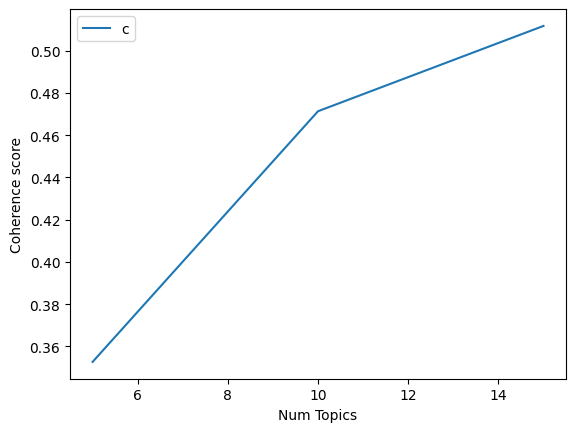

In [151]:
#This will generate multiple topic models with various topic count, then return the model with highest coherence
#it will also display a quick visual of coherence values, to understand what topic count is best and why it was chosen
LDA_model, corpus = create_lda_model(df, 20, 5, 5)
LDA_model

In [152]:
#here we create a list of topic words and their associated weights
LDA_model_topics = LDA_model.print_topics() #LDA_model[corpus]

LDA_model_topics.sort()
print(len(LDA_model_topics))
LDA_model_topics


15


[(0,
  '0.014*"spending" + 0.012*"say" + 0.011*"mandate" + 0.010*"pass" + 0.009*"military" + 0.009*"get" + 0.009*"prevent" + 0.009*"leader" + 0.007*"member" + 0.007*"religious"'),
 (1,
  '0.015*"mall" + 0.015*"courtesy" + 0.015*"photo" + 0.015*"vaccination" + 0.015*"say" + 0.012*"people" + 0.012*"long" + 0.012*"shot" + 0.012*"monkeypox" + 0.012*"sign"'),
 (2,
  '0.032*"exemption" + 0.025*"medical" + 0.021*"say" + 0.013*"russian" + 0.011*"immunization" + 0.011*"decision" + 0.010*"military" + 0.008*"health" + 0.008*"cooperation" + 0.008*"country"'),
 (3,
  '0.019*"disease" + 0.019*"flu" + 0.017*"spanish" + 0.013*"pandemic" + 0.011*"bacterial" + 0.010*"soldier" + 0.009*"people" + 0.008*"kill" + 0.008*"th" + 0.008*"many"'),
 (4,
  '0.027*"military" + 0.020*"religious" + 0.018*"request" + 0.017*"member" + 0.017*"service" + 0.012*"mandate" + 0.011*"exemption" + 0.009*"approve" + 0.006*"say" + 0.006*"find"'),
 (5,
  '0.016*"russian" + 0.015*"country" + 0.012*"conduct" + 0.012*"agree" + 0.012*

In [153]:
topic_dict = topic_level_sentiment(LDA_model)
topic_dict

{'Topic_0': ['spending',
  'say',
  'mandate',
  'pass',
  'military',
  'get',
  'prevent',
  'leader',
  'member',
  'religious'],
 'Topic_1': ['mall',
  'courtesy',
  'photo',
  'vaccination',
  'say',
  'people',
  'long',
  'shot',
  'monkeypox',
  'sign'],
 'Topic_2': ['exemption',
  'medical',
  'say',
  'russian',
  'immunization',
  'decision',
  'military',
  'health',
  'cooperation',
  'country'],
 'Topic_3': ['disease',
  'flu',
  'spanish',
  'pandemic',
  'bacterial',
  'soldier',
  'people',
  'kill',
  'th',
  'many'],
 'Topic_4': ['military',
  'religious',
  'request',
  'member',
  'service',
  'mandate',
  'exemption',
  'approve',
  'say',
  'find'],
 'Topic_5': ['russian',
  'country',
  'conduct',
  'agree',
  'substantive',
  'minister',
  'cooperation',
  'express',
  'say',
  'state'],
 'Topic_6': ['category',
  'datum',
  'code',
  'diagnostic',
  'say',
  'ambulatory',
  'medical',
  'summary',
  'system',
  'military'],
 'Topic_7': ['say',
  'elkin',
  'ex

# DATA VISUALIZATION

## Pre-processing dataframe for visualization

In [154]:
#making a new dataframe 
df_main_topic = add_main_topic_dataframe(df, LDA_model, corpus)

df_main_topic

#LDA_model.get_document_topics(corpus)
#df['Topics'] = LDA_model.get_document_topics(corpus)
#df.shape

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text,Topics,Main Topic,Main Topic Score
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"near, effectively, confident, major, new, more...","needless, single, past, absolutely, other","this week, global elitists and world leaders f...","[(10, 0.9960617)]",10,0.996062
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"social, largely, compelling, more, first, own,...","excuse, unable, active, firm, failed, absolute...",president joe biden recently declared but unva...,"[(3, 0.6574597), (14, 0.33616692)]",3,0.657460
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"clearly, effectively, effective, far, historic...","few, unknown, long, hard, less, badly, past, w...",the “spanish flu” killed an estimated 50-100 m...,"[(3, 0.99872655)]",3,0.998727
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"early, greatly, natural, special, economic, im...","foreign, military, actively, mainly",islamabad - russia on wednesday assured pakist...,"[(2, 0.9007007), (5, 0.096258104)]",2,0.900701
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"not, fine, willingly, first, unique, good, full","very, wrong, guilty, base, sorry, other, milit...",a canadian armed forces officer who urged othe...,"[(7, 0.99750423)]",7,0.997504
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"new, light, first, direct, directly, kind","active, long, green, previously, foreign, mili...",sweden will break its doctrine of not sending ...,"[(11, 0.9933331)]",11,0.993333
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"near, developed, sincere, nearly, most, new, s...","active, firm, previous, limited, military, app...",the air force is allowing instructors who rema...,"[(14, 0.99337834)]",14,0.993378
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"modest, relevant, astounding, greatest, willin...","few, very, down, long, average, foreign, terri...",we need for members of congress and other amer...,"[(13, 0.9979293)]",13,0.997929
11,https://childrenshealthdefense.org/defender/he...,0.10,Neutral Positive,0.40,"very, perfect, willing, overwhelming, free, to...","down, unable, long, late, horrible, painful, m...","heather elkins, 45, couldn’t get a medical exe...","[(7, 0.9983879)]",7,0.998388
14,https://www.foxnews.com/us/pentagon-rushed-den...,0.00,Neutral Negative,0.42,"quick, greater, general","average, single, less, partial, other, military",a pentagon report found the military was likel...,"[(4, 0.9943772)]",4,0.994377


## Visualize all articles on their main topic

In [155]:
df_main_topic['Shortened Address'] = df_main_topic['URL'].str.slice(0,35) #shorten the urls to make them easier to read in hover text

df_main_topic = df_main_topic.sort_values('Main Topic') #sort df by main topic so it is in order in the graph.

fig_w_topics = px.scatter(df_main_topic, x="Main Topic", y="Sentiment Score",
                         size="Main Topic Score", custom_data = ['Shortened Address', 'Sentiment Label', 'Main Topic Score'],
                         title="Articles Sorted By Main Topic")#creating a scatter plot with x, y, and color from our df. 
#The custom_data is what we will add to our hover text

fig_w_topics.update_traces(hovertemplate="<br>".join(["Address: %{customdata[0]}",
                                                     "Sentiment Label: %{customdata[1]}",
                                                     "Main Topic Score :%{customdata[2]}"])
                          )#set the hover text to show whatwas in custom_data

fig_w_topics.update_xaxes(type="category")#turn into categorical not continuous data for the x-axis

fig_w_topics.show()

# Generating Cluster Graph of Topics

In [157]:
num_topics = len(LDA_model_topics)

#print(num_topics)

#Get Topic Weights
topic_weights = []
for i in df["Topics"]:
    per_doc_list = [None] * num_topics
    #print(len(per_doc_list))
    for x in i:
        #print(x)
        per_doc_list[x[0]] = x[1]
    topic_weights.append(per_doc_list)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).to_numpy()

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

#print(arr)

# tSNE Model Creation
tsne_model = TSNE(n_components=2, verbose=1, 
                  random_state=0, angle=.99, 
                  init='pca', perplexity = (arr.shape[0] - 1) / 3)
tsne_lda = tsne_model.fit_transform(arr)

#Color palette for the clusters
mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])

#Formatting
df['Main Topic'] = df['Main Topic'].apply(int)#turn them into ints so we can sort by main topic, then back to str

df = df.sort_values(by=['Main Topic'],ascending = True)#sort by main topic to make the legend pretty

df['Main Topic'] = df['Main Topic'].apply(str) #this makes it so we can use main topic as categorical data

#creating the cluster graph in plotly
fig_cluster = px.scatter(df, x = tsne_lda[:,0],y = tsne_lda[:,1],
                        custom_data = ['Shortened Address', 'Sentiment Label', 'Main Topic'],
                        color = "Main Topic",#mycolors[topic_num],
                        size = "Main Topic Score",
                        title = "Topic Clustering Graph",
                        labels = dict(color = "Main Topic"))

fig_cluster.update_traces(hovertemplate="<br>".join(["Address: %{customdata[0]}",
                                                     "Sentiment Label: %{customdata[1]}",
                                                     "Main Topic:%{customdata[2]}"])
                          )#set the hover text to show whatwas in custom_data

fig_cluster.show()

df['Main Topic'] = df['Main Topic'].apply(int)#turn back to int


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 17 samples in 0.001s...
[t-SNE] Computed neighbors for 17 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 17 / 17
[t-SNE] Mean sigma: 0.532170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.105217
[t-SNE] KL divergence after 900 iterations: 0.207979


## Subjectivity vs Sentiment of Articles for a single topic

In [158]:
df_topic_0 = df[df['Main Topic'] == 0]


t_string = "Sentiment Analysis on Topic " + "0"
fig = px.scatter(df_topic_0, x = "Subjectivity Score", y = "Sentiment Score", 
                size = "Main Topic Score", hover_name = "Shortened Address", title = t_string)

#df_topic_0
fig.show()

## K means Clustering

In [159]:
#https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
#https://scikit-learn.org/stable/modules/clustering.html#k-means


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [161]:
#gather all topics per document as a list of lists of tuples
document_topics = [LDA_model.get_document_topics(item, minimum_probability = 0.0) for item in corpus]

topic_cols = [x[0] for x in document_topics[0]] #get the num of topics to add to df


df_topics = pd.DataFrame(columns = [topic_cols])#make df with topics

for i in document_topics:
    topic_scores = [x[1] for x in i]
    df_topics.loc[len(df_topics.index)] = topic_scores

x = df.iloc[:,[1,3,8]]

#document_topics
df_topics


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.000281,0.996062,0.000281,0.000281,0.000281,0.000281
1,0.000490,0.000490,0.000490,0.657466,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.000490,0.336161
2,0.000091,0.000091,0.000091,0.998727,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
3,0.000234,0.000234,0.900701,0.000234,0.000234,0.096258,0.000234,0.000234,0.000234,0.000234,0.000234,0.000234,0.000234,0.000234,0.000234
4,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.997504,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178,0.000178
5,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.993333,0.000476,0.000476,0.000476
6,0.000198,0.000198,0.004042,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.000198,0.993379
7,0.001299,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.997862,0.000065
8,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.998388,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115
9,0.000402,0.000402,0.000402,0.000402,0.994377,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402


C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

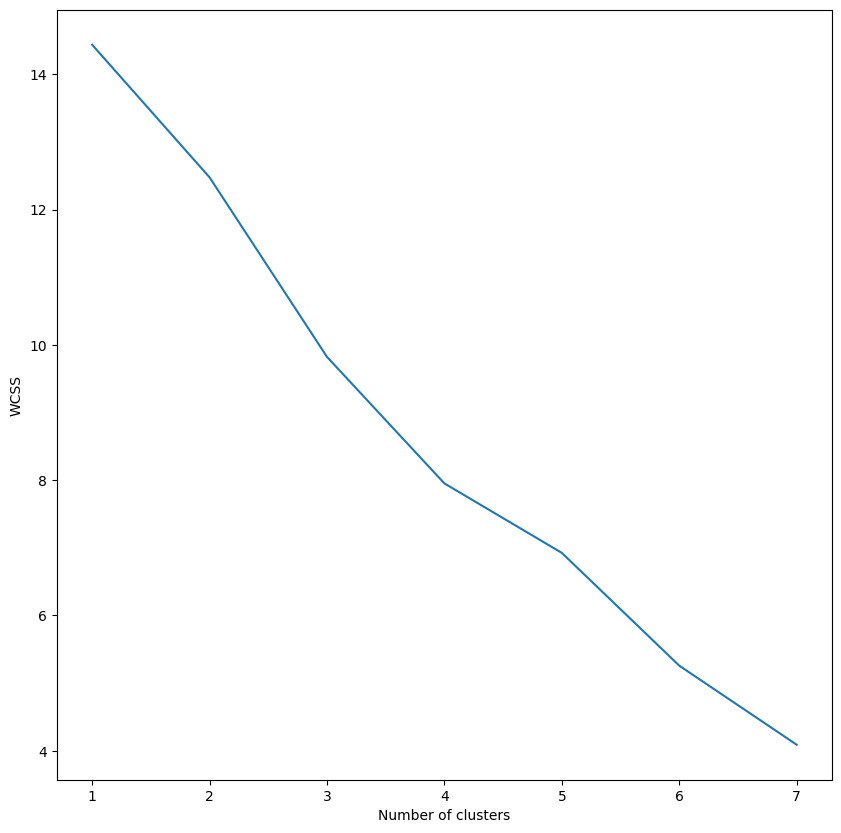

In [162]:
#kmeans_clustering = KMeans(n_clusters = 3, n_init = 3).fit_predict(X_tfidf)

#print(kmeans_clustering)

# def find_optimal_clusters(data, max_k):
#     iters = range(2, max_k+1, 2)
    
#     sse = []
#     for k in iters:
#         sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
#         print('Fit {} clusters'.format(k))
        
#     f, ax = plt.subplots(1, 1)
#     ax.plot(iters, sse, marker='o')
#     ax.set_xlabel('Cluster Centers')
#     ax.set_xticks(iters)
#     ax.set_xticklabels(iters)
#     ax.set_ylabel('SSE')
#     ax.set_title('SSE by Cluster Center Plot')
    
# find_optimal_clusters(x, 5)

wcss = []
for i in range(1,8):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(df_topics)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [171]:
pca = PCA(10) #set to number of components
data = pca.fit_transform(df_topics) #apply principled component analysis

C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



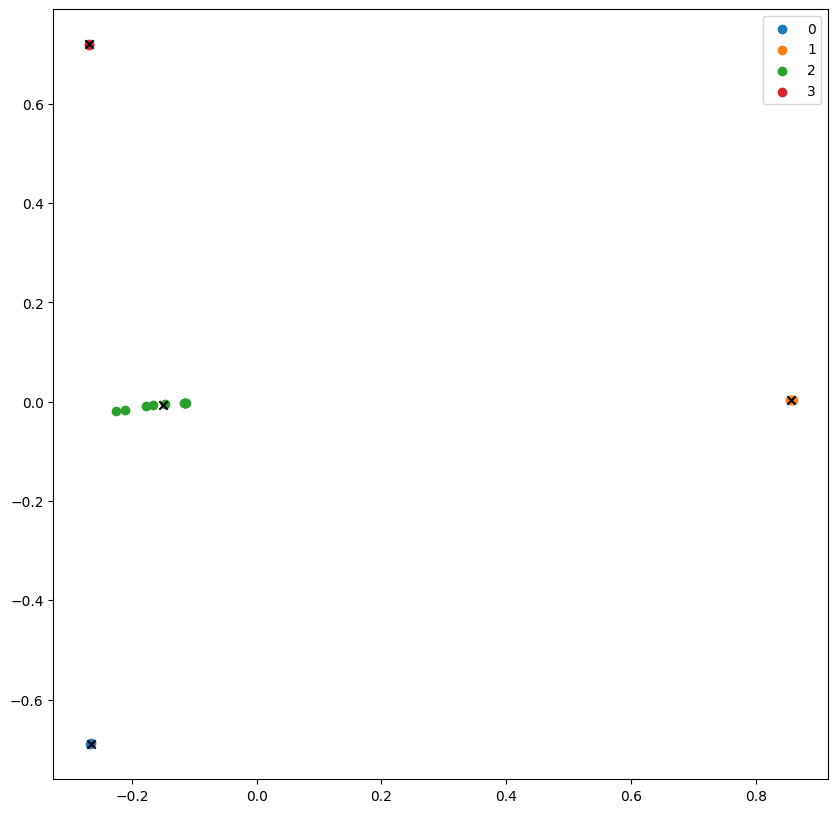

In [172]:

model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
centers = np.array(model.cluster_centers_)

plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()